# **Pizza Sales Analysis | SQL Project**

## Project Overview
This project aims to analyze pizza sales data to uncover key insights and provide actionable recommendations for improving business performance. The project involves: 
- Data cleaning;
- Database design;
- Performing ad-hoc analysis using SQL queries to extract insights into pizza sales trends;
- Provide insights and recommendations.



## About the Dataset
This dataset contains detailed information about pizza orders, including specifics about the pizza variants, quantities, pricing, dates, times, and categorization details.

1. **pizza_id**: A unique identifier assigned to each distinct pizza variant available for ordering;
2. **order_id**: A unique identifier for each order made, which links to multiple pizzas;
3. **pizza_name_id**: An identifier linking to a specific name of the pizza;
4. **quantity**: The number of units of a specific pizza variant ordered within an order;
5. **order_date**: The date when the order was placed;
6. **order_time**: The time when the order was placed;
7. **unit_price**: The cost of a single unit of the specific pizza variant;
8. **total_price**: The aggregated cost of all units of a specific pizza variant in an order;
9. **pizza_size**: Represents the size of the pizza (e.g., small, medium, large);
10. **pizza_category**: Indicates the category of the pizza, such as vegetarian, non-vegetarian, etc;
11. **pizza_ingredients**: Provides a list or description of the ingredients used in the pizza;
12. **pizza_name**: Specifies the name of the specific pizza variant ordered.

The data source: [Kaggle - Pizza Sales Dataset](https://www.kaggle.com/datasets/nextmillionaire/pizza-sales-dataset)


## Import Libraries

In [1]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


## Load the Data

In [ ]:
df = pd.read_csv(r'data\pizza_sales.csv')

df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## Data Cleaning

In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Change column type to int32 for columns: 'pizza_id', 'order_id', 'quantity'
    df = df.astype({'pizza_id': 'int32', 'order_id': 'int32', 'quantity': 'int32'})
    # Drop duplicate rows across all columns
    df = df.drop(columns=['pizza_name_id'])
    df = df.drop_duplicates()  
    df = df.reset_index(drop=True)
    return df

df_clean = clean_data(df.copy())

In [ ]:
def convert_date(date_str):
    try:
        # Trying to convert dates from the 'dd-mm-yyyy' format
        return pd.to_datetime(date_str, format='%d-%m-%Y').strftime('%Y-%m-%d')
    except ValueError:
        # If it doesn't work, try the format 'm/d/yyyy'
        return pd.to_datetime(date_str, format='%m/%d/%Y').strftime('%Y-%m-%d')

df_clean['order_date'] = df_clean['order_date'].apply(convert_date)

df_clean.head()

,pizza_id,order_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## Database

### Database Schema

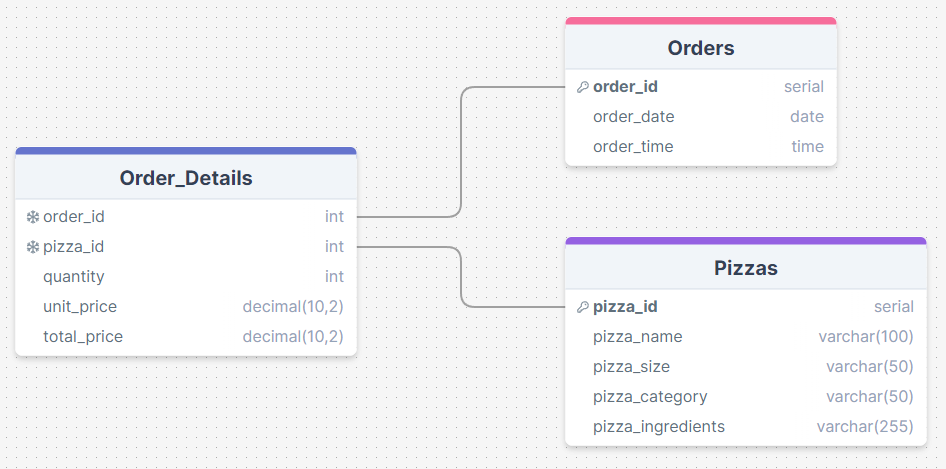

### Create the Database

In [ ]:
CREATE TABLE Orders (
    order_id SERIAL PRIMARY KEY,
    order_date DATE NOT NULL,
    order_time TIME NOT NULL
);

CREATE TABLE Pizzas (
    pizza_id SERIAL PRIMARY KEY,
    pizza_name VARCHAR(100) NOT NULL,
    pizza_size VARCHAR(50) NOT NULL,
    pizza_category VARCHAR(50) NOT NULL,
    pizza_ingredients VARCHAR(255) NOT NULL
);

CREATE TABLE Order_Details (
    order_id INTEGER REFERENCES Orders(order_id),
    pizza_id INTEGER REFERENCES Pizzas(pizza_id),
    quantity INTEGER NOT NULL,
    unit_price DECIMAL(10, 2) NOT NULL,
    total_price DECIMAL(10, 2) NOT NULL,
    PRIMARY KEY (order_id, pizza_id)
);

### Data Filling

In [ ]:
# Load environment variables from .env file
load_dotenv()

# Retrieving data from environment variables
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')

engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

orders_df = df_clean[['order_id', 'order_date', 'order_time']]
pizzas_df = df_clean[['pizza_id', 'pizza_name', 'pizza_size', 'pizza_category', 'pizza_ingredients']]
order_details_df = df_clean[['order_id', 'pizza_id', 'quantity', 'unit_price', 'total_price']]

In [ ]:
orders_df.to_sql('Orders', engine, if_exists='append', index=False)
pizzas_df.to_sql('Pizzas', engine, if_exists='append', index=False)
order_details_df.to_sql('Order_Details', engine, if_exists='append', index=False)

620

## Ad-hoc Analysis

### Average sales per day

In [ ]:
SELECT 
    ROUND(AVG(subquery.daily_sales)::NUMERIC, 2) AS average_daily_sales
FROM (
    SELECT SUM(od.total_price) AS daily_sales
    FROM Order_details od
    JOIN Orders o ON od.order_id = o.order_id
    GROUP BY o.order_date
) AS subquery;

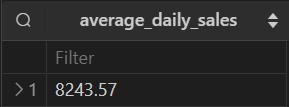

### Average Number of Pizzas per Order

In [ ]:
SELECT 
    ROUND(AVG(order_total_quantity), 2) AS avg_quantity_per_order
FROM (
    SELECT 
        order_id, 
        SUM(quantity) AS order_total_quantity
    FROM 
        order_details
    GROUP BY 
        order_id
) AS order_quantities;

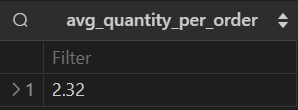

In [ ]:
SELECT 
    TO_CHAR(date_trunc('month', o.order_date::date), 'month') AS month,
    SUM(od.quantity) AS total_quantity,
    ROUND(SUM(od.total_price)) AS total_revenue,
    SUM(od.total_price) OVER (
        PARTITION BY od.order_id 
        ORDER BY od.pizza_id
    ) AS Rolling_total
FROM 
    Orders AS o
JOIN 
    Order_Details AS od ON 
    o.order_id = od.order_id
GROUP BY 
    month, 
ORDER BY 
    total_revenue DESC;

### Top 5 Best- and Worst-Selling Pizzas (by Quantity)

In [ ]:
WITH ranked_best AS (
    SELECT 
        pizza_name, 
        SUM(quantity) AS order_amount,
        ROW_NUMBER() OVER (ORDER BY SUM(quantity) DESC) AS rank
    FROM 
        Pizzas AS p
    JOIN 
        order_details AS od ON 
        od.pizza_id = p.pizza_id 
    GROUP BY 
        pizza_name
    ORDER BY 
        order_amount DESC
    LIMIT 5
),
ranked_worst AS (
    SELECT 
        pizza_name, 
        SUM(quantity) AS order_amount,
        ROW_NUMBER() OVER (ORDER BY SUM(quantity) ASC) AS rank
    FROM 
        Pizzas AS p
    JOIN 
        order_details AS od ON 
        od.pizza_id = p.pizza_id 
    GROUP BY 
        pizza_name
    ORDER BY 
        order_amount ASC
    LIMIT 5
)
SELECT 
    best.pizza_name AS best_pizza_name,
    best.order_amount AS best_order_amount,
    worst.pizza_name AS worst_pizza_name,
    worst.order_amount AS worst_order_amount
FROM 
    ranked_best best
FULL OUTER JOIN 
    ranked_worst worst ON
    best.rank = worst.rank
ORDER BY 
    best.rank;

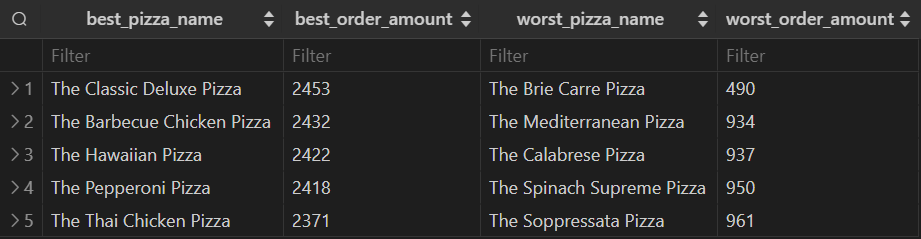

### Most Profitable Hours of the Day

In [ ]:
SELECT
    to_char(date_trunc('hour', (CURRENT_DATE + o.order_time::interval)), 'HH24:MI') AS hour_of_day,
    SUM(od.quantity) AS total_quantity,
    ROUND(AVG(SUM(od.quantity)) OVER()) AS avg_quantity,
    ROUND(SUM(od.total_price)) AS total_revenue,
    ROUND(AVG(SUM(od.total_price)) OVER()) AS avg_revenue
FROM 
    Orders AS o
JOIN 
    order_details od ON 
    od.order_id = o.order_id
GROUP BY 
    hour_of_day
ORDER BY 
    total_quantity DESC;

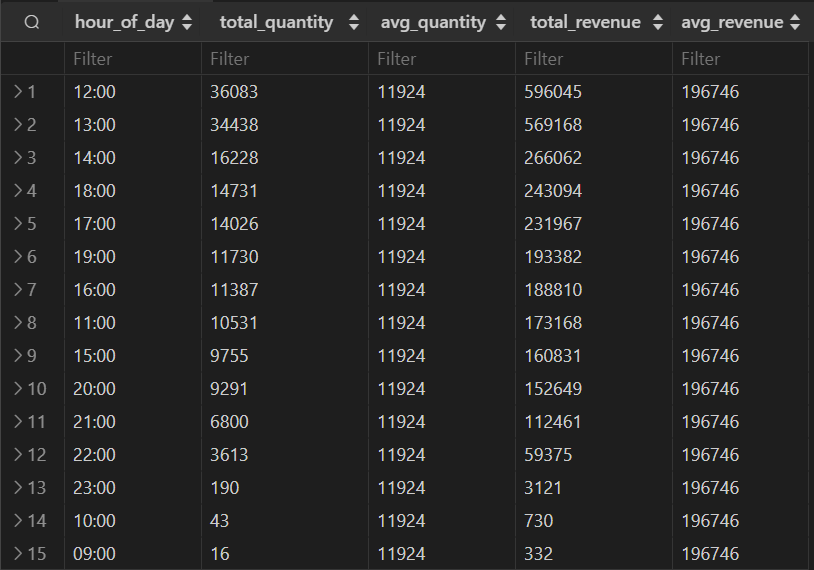
![hourly_quantity](image\hourly_quantity.png)
![hourly_revenue](image\hourly_revenue.png)


### Months with Orders Placed at 23:00, 10:00, and 09:00

In [ ]:
SELECT
    to_char(o.order_date::date, 'YYYY-MM') AS month,
    to_char(date_trunc('hour', (CURRENT_DATE + o.order_time::interval)), 'HH24:MI') AS hour_of_day,
    SUM(od.quantity) AS total_quantity
FROM 
    Orders AS o
JOIN 
    order_details od ON 
    od.order_id = o.order_id
WHERE 
    to_char(date_trunc('hour', (CURRENT_DATE + o.order_time::interval)), 'HH24:MI') IN ('23:00', '10:00', '09:00')
GROUP BY 
    month, hour_of_day
ORDER BY 
    month ASC, hour_of_day ASC;

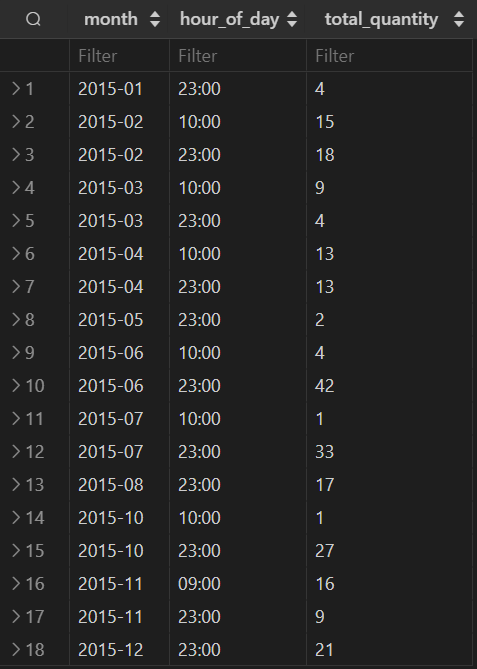
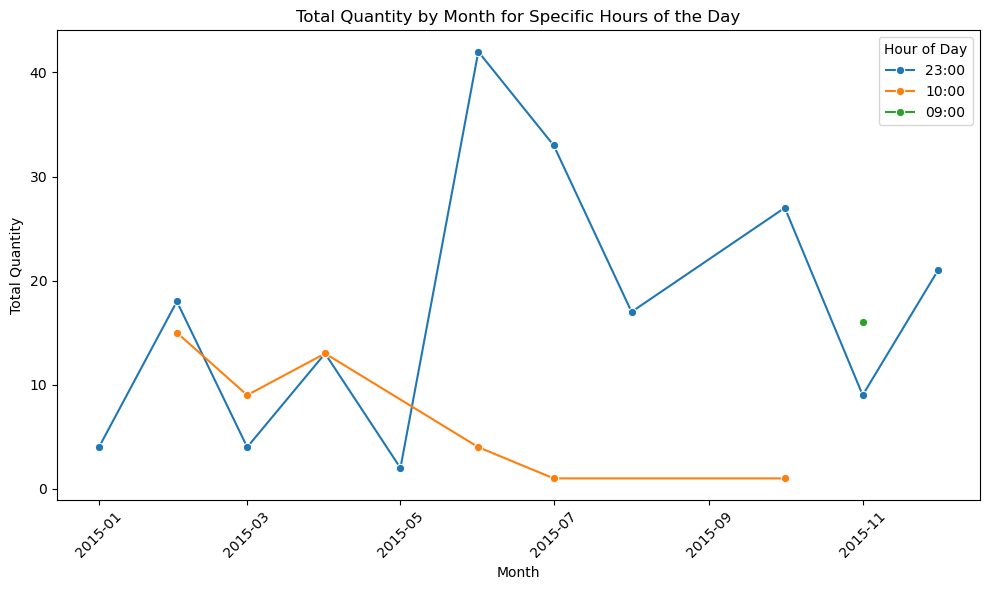

### Most Profitable Days of the Week

In [ ]:
SELECT
    to_char(order_date::date, 'Day') AS day_of_week,
    SUM(od.quantity) AS total_quantity,
    ROUND(SUM(od.total_price)::NUMERIC, 2) AS total_revenue
FROM 
    Orders AS o
JOIN 
    order_details od ON 
    od.order_id = o.order_id
GROUP BY 
    day_of_week
ORDER BY 
    total_quantity DESC;

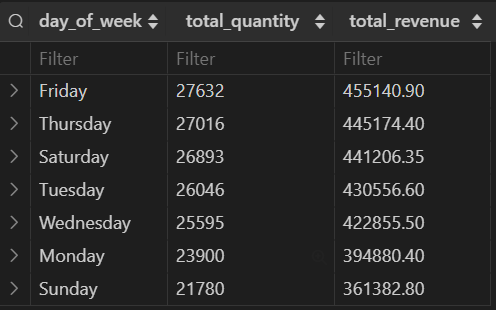
![weekly_quantity](image\weekly_quantity.png)
![weekly_revenue](image\weekly_revenue.png)

### Most Profitable Months of the Year

In [ ]:
SELECT 
    TO_CHAR(date_trunc('month', o.order_date::date), 'month') AS month,
    SUM(od.quantity) AS total_quantity,
    ROUND(SUM(od.total_price)) AS total_revenue
FROM 
    Orders AS o
JOIN 
    Order_Details AS od ON 
    o.order_id = od.order_id
GROUP BY 
    month
ORDER BY 
    total_revenue DESC;

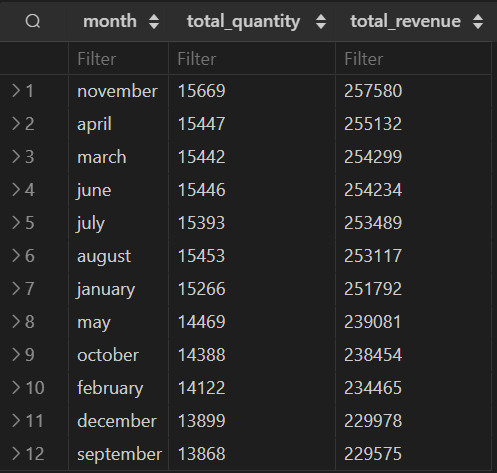
![montly_quantity](image\montly_quantity.png)
![montly_revenue](image\montly_revenue.png)

### Best-Performing Pizza Category

In [ ]:
SELECT 
    DISTINCT p.pizza_category,
    SUM(od.quantity) AS total_quantity,
    ROUND(SUM(od.total_price)) AS total_revenue
FROM 
    pizzas p
JOIN
    order_details od ON
    p.pizza_id = od.pizza_id
GROUP BY
    p.pizza_category
ORDER BY
    total_quantity DESC


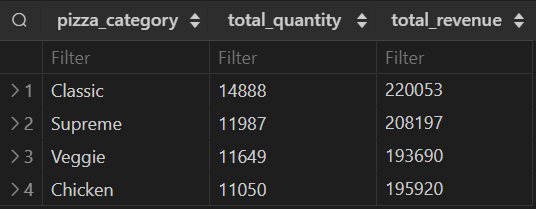
![pizza_category_quantity](image\pizza_category_quantity.png)
![pizza_category_revenue](image\pizza_category_revenue.png)

### Pizza Size Performance

In [ ]:
SELECT 
    DISTINCT p.pizza_size,
    SUM(od.quantity) AS total_quantity,
    ROUND(SUM(od.total_price)) AS total_revenue
FROM 
    pizzas p
JOIN
    order_details od ON
    p.pizza_id = od.pizza_id
GROUP BY
    p.pizza_size
ORDER BY
    total_quantity DESC

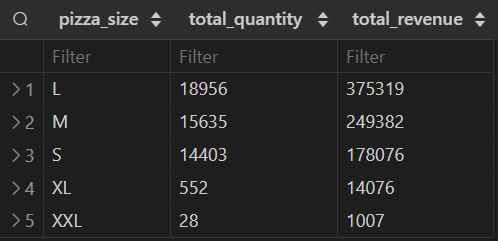
![pizza_size_quantity](image\pizza_size_quantity.png)
![pizza_size_revenue](image\pizza_size_revenue.png)

### Top 5 Orders by Total Price


In [ ]:
SELECT 
    order_id, 
    SUM(total_price) as sum_total_price
FROM 
    Order_details
GROUP BY 
    order_id
ORDER BY 
    sum_total_price DESC
LIMIT 5;

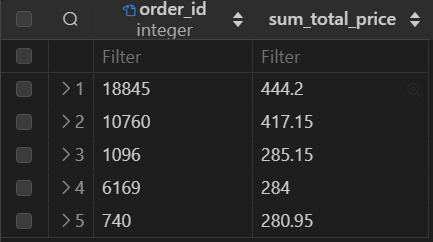

### Items Ordered in the Most Expensive Order

In [ ]:
SELECT 
    p.pizza_id,
    p.pizza_name,
    p.pizza_size,
    SUM(od.total_price) OVER(
        PARTITION BY p.pizza_id
    ) AS Pizza_price,
    SUM(od.total_price) OVER (
        PARTITION BY od.order_id 
        ORDER BY od.pizza_id
    ) AS Rolling_total,
    RANK() OVER(
        ORDER BY od.total_price DESC
    ) AS Price_rank
FROM 
    Pizzas p
JOIN 
    order_details od ON
    od.pizza_id = p.pizza_id
WHERE od.order_id = (
    SELECT order_id
    FROM Order_details
    GROUP BY order_id
    ORDER BY SUM(total_price) DESC
    LIMIT 1);


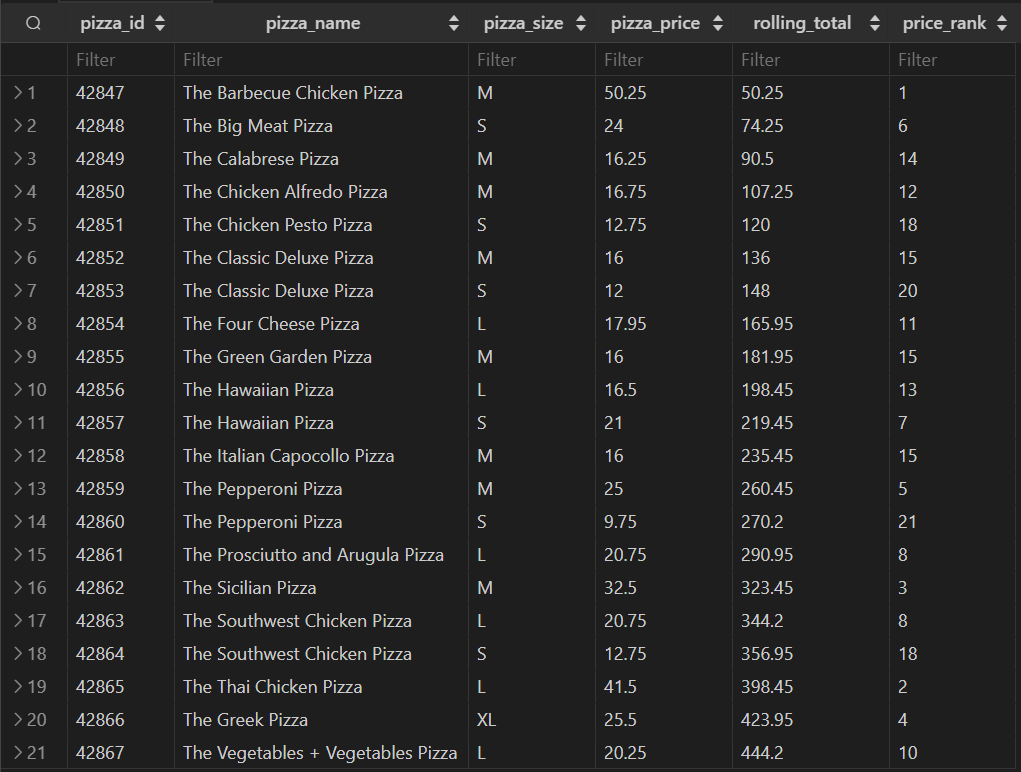

## Insights


### Popular and Unpopular Pizzas

#### Top-selling Pizzas:
1. The Classic Deluxe Pizza (2,453 orders)
2. The Barbecue Chicken Pizza (2,432 orders)
3. The Hawaiian Pizza (2,422 orders)
4. The Pepperoni Pizza (2,418 orders)
5. The Thai Chicken Pizza (2,371 orders)

#### Least Popular Pizzas:
1. The Brie Carre Pizza (490 orders)
2. The Mediterranean Pizza (934 orders)
3. The Calabrese Pizza (937 orders)
4. The Spinach Supreme Pizza (950 orders)
5. The Soppressata Pizza (961 orders)


### Sales Trends Over Time

#### Hourly Sales

**Most Profitable Hours**: 
1. 12:00 ($596,045 total revenue, 36,083 orders)
2. 13:00 ($569,168 total revenue, 34,438 orders)

**Least Profitable Hours**: 
1. 09:00 ($332 total revenue, 16 orders)
2. 10:00 ($730 total revenue, 43 orders)
3. 23:00 ($3,121 total revenue, 190 orders)
4. 22:00 ($59,375 total revenue, 3,121 orders)

- ![Hourly sales](images/hourly_sales_by_quantity.png)

#### Profitability by Day of the Week
- **Most Profitable Days**: Friday (27,632 orders) and Thursday (27,016 orders) are the most profitable days of the week.
- **Least Profitable Days**: Sunday (21,780 orders) and Monday (23,900 orders) generated the lowest revenue.

![Quantity of Pizzas Sold by Day of the Week](images/quantity_of_pizzas_sold_by_day_of_the_week.png)

#### Profitability by Month
- **Least Profitable Months**: May, October, February, December, and September were below average in revenue, with revenues ranging from $229,575 to $239,081.
- Although no clear seasonal pattern was identified, more data is needed to draw definitive conclusions.

![Profitability by Month](images/Total_Quantity_of_Pizzas_Sold_by_Month.png)


### Profitability by Pizza Category
- **Most Popular Category**: Classic pizzas are the most popular, generating $220,053 in revenue and selling 14,888 units.
- **Least Popular Category**: Chicken pizzas were the least popular, generating $195,920 in revenue from 11,050 units sold.

![Total Quantity by Pizza Category](images/Total_Quantity_by_Pizza_Category.png)
![Total Revenue by Pizza Category](images/Tota_Revenue_by_Pizza_Category.png)


### Profitability by Pizza Size
- **Most Popular Sizes**: Large (L) and Medium (M) pizzas generated the highest revenue, with $375,319 and $249,382 respectively.
- **Least Popular Sizes**: Extra Large (XL) and Extra Extra Large (XXL) pizzas generated the lowest revenue, with minimal sales and revenues of $14,076 and $1,007 respectively.

![Total Quantity by Pizza Size](images/Total_Quantity_of_Pizzas_Sold_by_Size.png)
![Total Revenue by Pizza Size](images/Total_Revenue_by_Pizza_Size.png)


## Recommendations

### Focus on Popular Pizzas:
- Increase marketing and promotion efforts for the top-selling pizzas, such as The Classic Deluxe Pizza and The Barbecue Chicken Pizza, to maintain high demand and boost revenue.


### Optimize Operations During Peak Hours:
- Ensure sufficient stock and staffing during peak hours from 12:00 PM to 1:00 PM to maximize revenue. Consider offering special promotions during these hours to further increase sales.


### Less Profitable Hours

#### Analysis of Low Sales Hours:
- The sales during the hours of 22:00, 09:00, 10:00, and 23:00 are significantly lower compared to peak hours. For instance, the revenue at 09:00 was just $332, at 10:00 it was $730, and at 23:00 it was $3,121 for the entire year.
- However, we lack data on staffing levels and employee wages, which would be necessary for a more in-depth analysis of operational efficiency during these low-sales periods.

#### Recommendation 1: Optimize Staffing:
- If the staffing levels during these low-sales hours are the same as during peak hours (12:00, 13:00), it might be worth considering adjusting the number of staff to better align with the reduced demand. This could help reduce operational costs while maintaining service quality.

#### Recommendation 2: Consider Reducing Operating Hours:
- Another option is to reduce operating hours by closing the store during 09:00, 10:00, and 23:00. The sales during these times are minimal and likely do not justify the cost of keeping the store open.
- For example, total sales at 09:00 brought in $332, at 10:00 $730, and at 23:00 $3,121 over the course of the year. It is likely that the labor costs during these times exceed the profits generated.
- Closing during these hours could also be presented positively to staff as an effort to improve work-life balance, allowing employees to start later or finish earlier.

#### Additional Observation:
- It's reasonable to infer that the low sales during these times are due to the time of day rather than a recent change in operating hours. The data shows consistent orders at 23:00 and 10:00 throughout the year, suggesting that the store has been open during these times for a significant period.
- The exception is 09:00, where only one large order was recorded in the eleventh month (16 pizzas in a single order). The average order size is typically around 2 pizzas (2.32, to be precise).
![Total Quantity by Month for Scecific Hours of the Day](images/total_quantity_by_month.png)


### Encourage Sales on Less Profitable Days of the Week:
- Consider introducing special offers or promotions on Sundays and Mondays to stimulate sales on these less profitable days.


### Reevaluate Strategies by Month:
- Since certain months have shown below-average revenue, it may be beneficial to introduce seasonal promotions or new product offerings during these periods to boost sales.


### Focus on Popular Pizza Sizes:
- Continue to offer a wide range of Large (L) and Medium (M) pizzas as they generate the most revenue.